# Solution: Modelling waning immunity

The SIR model structure with waning immunity can be visualised like this:

<img src="w4_nb3_model_diagram.png">

### What is the value of the waning rate $\sigma$ if the average duration of immunity is 10 years?

$\sigma$ = 1/10 = 0.1 years$^{-1}$

Warning message:
"package 'deSolve' was built under R version 3.6.1"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


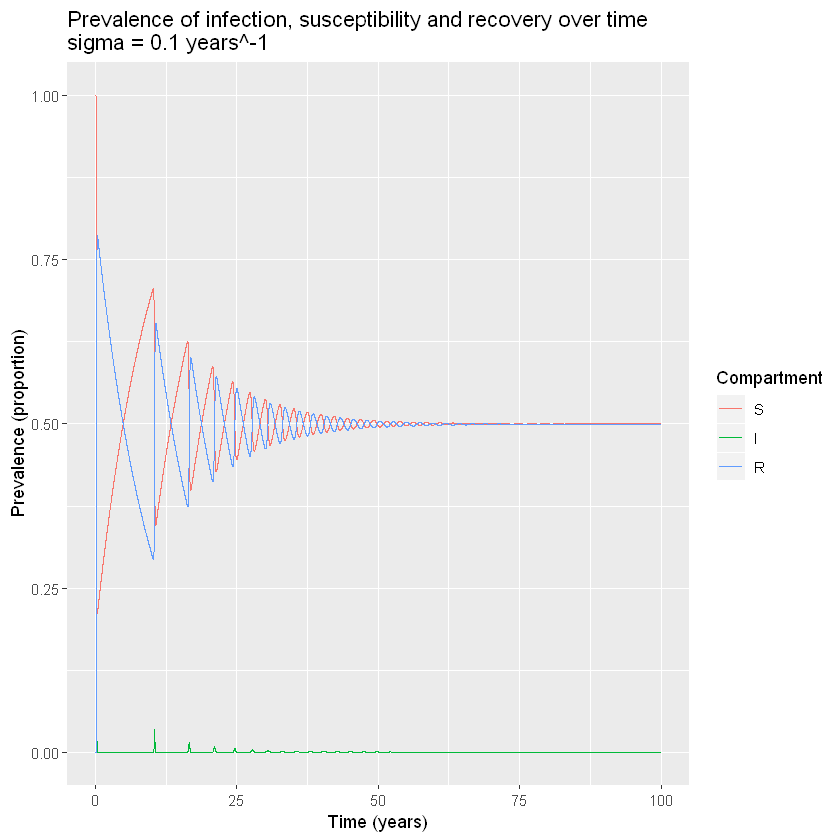

In [1]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

# Vector storing the initial number of people in each compartment (at timestep 0)
initial_state_values <- c(S = 1000000-1, # the whole population is susceptible
                          I = 1,         # the epidemic starts with a single infected person
                          R = 0)         # no one is immune yet

# Vector storing the parameters describing the transition rates in units of years^-1
parameters <- c(beta = 0.4*365,      # the infection rate, which acts on susceptibles
                gamma = 0.2*365,     # the rate of recovery, which acts on those infected
                sigma = 1/10)        # the rate of waning of immunity, which acts on those recovered 

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 100, by = 2/365)   # from 0 to 100 years in timesteps of every 2 days

# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order): time, state and parameters
sir_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {  # tell R to look for variable names within the state and parameters objects    
        
    # Calculating the total population size N (the sum of the number of people in each compartment)
      N <- S+I+R
      
    # Defining lambda as a function of beta and I:
      lambda <- beta * I/N
        
    # The differential equations
      dS <- -lambda * S + sigma * R   # recovered individuals now return to the susceptible compartment at a rate sigma          
      dI <- lambda * S - gamma * I            
      dR <- gamma * I - sigma * R     # immune individuals leave the recovered compartment at a rate sigma               
      
    # Return the number of people in the S, I and R compartments at each timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

# Adding a column for the prevalence proportion to the long-format output
output_long$prevalence <- output_long$value/sum(initial_state_values)

# Plot the prevalence proportion
ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = prevalence, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (years)")+                                                   # add label for x axis
  ylab("Prevalence (proportion)") +                                      # add label for y axis
  labs(colour = "Compartment",                                           # add legend title
       title = "Prevalence of infection, susceptibility and recovery over time\nsigma = 0.1 years^-1")  # add plot title    

### What do you observe about the infection dynamics? How does this compare to the model with population turnover from the first notebook this week?

When modelling slow waning of immunity, we observe the same epidemic patterns as when we modelled an acute disease in a population with slow turnover: spikes of epidemics alternating with long deep troughs, reflected in the cycles of susceptibility and recovery, but eventually dying out. However, with an average duration of immunity of 30 years, the rate of waning is still quicker than human population turnover, and therefore the time between epidemics is shorter. While in the population turnover example, the source of new susceptibles were births, here it is the people losing their immunity that replenish the susceptible pool.

### What implications would this have for a vaccination programme against this disease?

Due to waning of vaccine-induced immunity, one-off vaccination of the population is not sufficient to prevent an epidemic in the future. The model predicts a second smaller epidemic occurring about 10 years after vaccination, so it might be necessary to deliver a second booster vaccine within that time period to maintain sufficient herd immunity in the population. However, it is important to note that this model makes many simplifying assumptions and ignores other factors affecting susceptibility in the population, so we cannot draw a conclusion based on this result alone. 

**Changing $\sigma$ to reflect fast waning of immunity:**

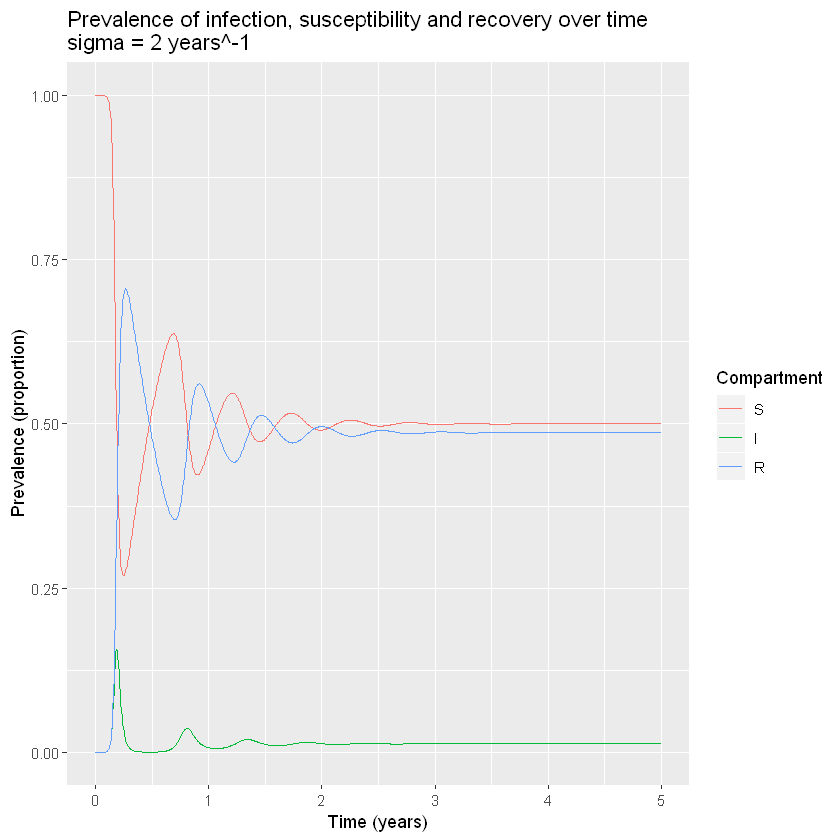

In [2]:
# Vector storing the parameters describing the transition rates in units of years^-1
parameters <- c(beta = 0.4*365,      # the infection rate, which acts on susceptibles
                gamma = 0.2*365,     # the rate of recovery, which acts on those infected
                sigma = 1/0.5)        # the rate of waning of immunity, which acts on those recovered 

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 5, by = 2/365)   # from 0 to 5 years in timesteps of every 2 days

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

# Adding a column for the prevalence proportion to the long-format output
output_long$prevalence <- output_long$value/sum(initial_state_values)

# Plot the prevalence proportion
ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = prevalence, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (years)")+                                                   # add label for x axis
  ylab("Prevalence (proportion)") +                                      # add label for y axis
  labs(colour = "Compartment",                                           # add legend title
       title = "Prevalence of infection, susceptibility and recovery over time\nsigma = 2 years^-1")   # add plot title    

### What do you observe about the infection dynamics? How does this compare to the model with slow waning of immunity, and with population turnover?

The outcome under these assumptions is very similar to what we observed when modelling an acute disease in the pig population with fast population turnover. The infection quickly reaches an endemic equilibrium with the effective reproduction number staying stable at just over 1, because just as in the pig population, the pool of susceptibles is continually replenished.

As you can see from both these examples, waning immunity acts in a similar way to the birth rate in the SIR model dynamics. 

**Changing the initial state values to reflect endemicity:**

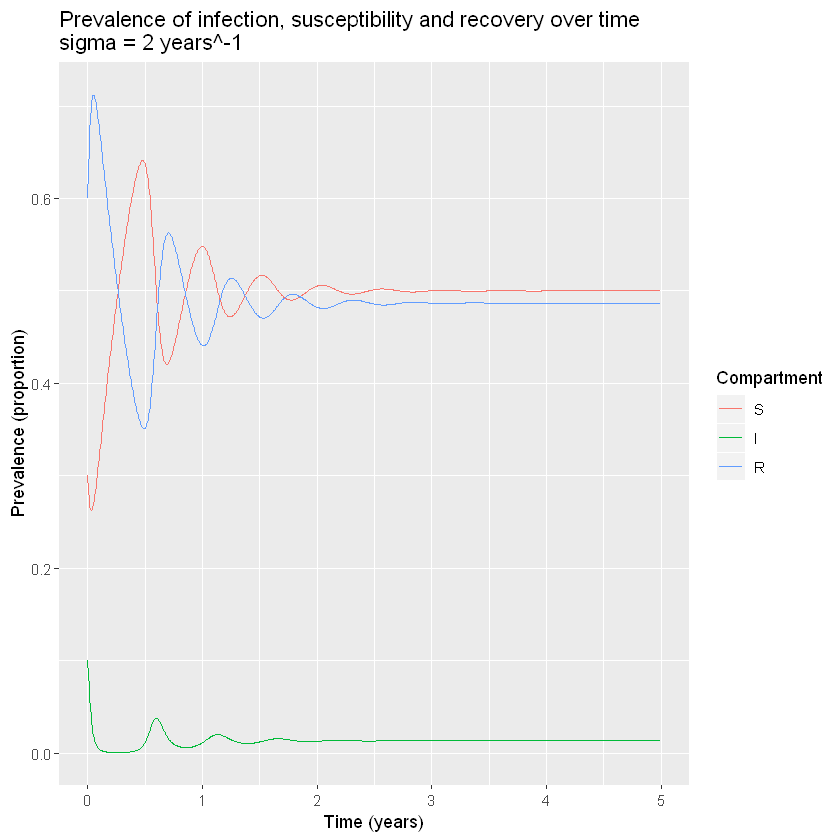

In [3]:
# Vector storing the initial number of people in each compartment (at timestep 0)
initial_state_values <- c(S = 0.3*1000000,  # 30% of the population are susceptible
                          I = 0.1*1000000,  # 10% of the population are infected
                          R = 0.6*1000000)  # 60% of the population are immune

# Vector storing the parameters describing the transition rates in units of years^-1
parameters <- c(beta = 0.4*365,      # the infection rate, which acts on susceptibles
                gamma = 0.2*365,     # the rate of recovery, which acts on those infected
                sigma = 1/0.5)        # the rate of waning of immunity, which acts on those recovered 

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 5, by = 2/365)   # from 0 to 5 years in timesteps of every 2 days

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

# Adding a column for the prevalence proportion to the long-format output
output_long$prevalence <- output_long$value/sum(initial_state_values)

# Plot the prevalence proportion
ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = prevalence, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (years)")+                                                   # add label for x axis
  ylab("Prevalence (proportion)") +                                      # add label for y axis
  labs(colour = "Compartment",                                           # add legend title
       title = "Prevalence of infection, susceptibility and recovery over time\nsigma = 2 years^-1")   # add plot title    

### What do you observe about the infection dynamics if you change the initial state values?

As you can see, the system eventually stabilises at the same values as in the previous example where we assumed introduction of a single infected case (although over a slightly different timescale). Generally if we are modelling an endemic infection, with a combination of parameters that leads to a continuous addition of new susceptibles and reaches an endemic equilibrium, the initial number in the compartments we start off with does not affect the endemic prevalence that is eventually reached (as long as there is at least one infected person, of course)!

This is in contrast to what you saw in the previous etivity, where changing the initial proportion of the population that was susceptible determined whether an epidemic would occur or not!